# 2D 1 Comp GMM

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
from scipy.stats import multivariate_normal
import corner as corner

In [58]:
%matplotlib notebook

### Data simulation

<IPython.core.display.Javascript object>


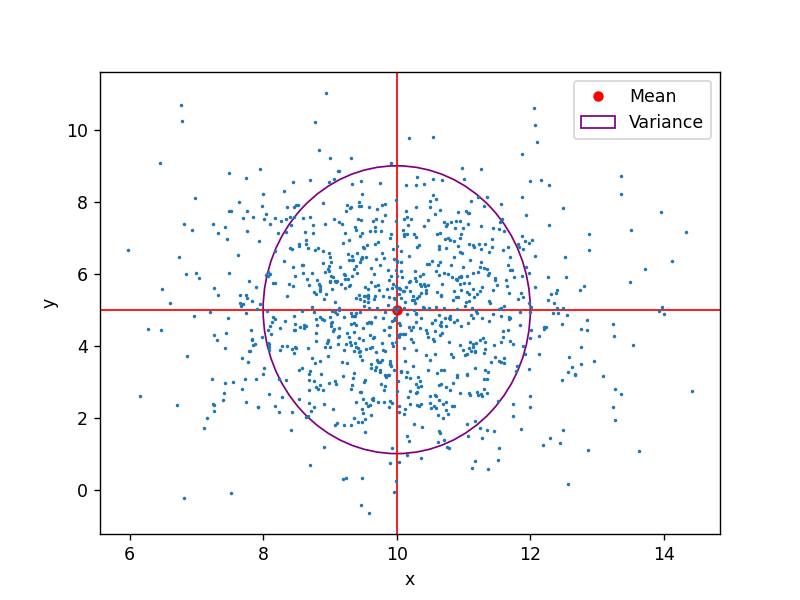

<IPython.core.display.Javascript object>


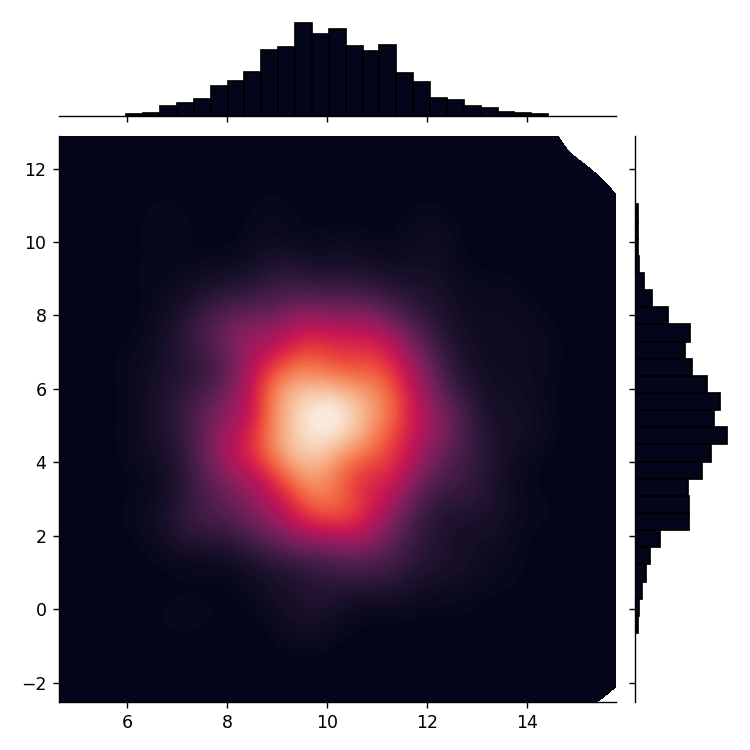

In [81]:
set_seed = True
if set_seed:
    np.random.seed(923114)

N = 1000
μ = [10, 5]
σ = [2, 4]
Σ = np.diag(σ)

data = multivariate_normal.rvs(mean=μ, cov=Σ, size=N)
x = data[:,0]
y = data[:,1]
ellipse = Ellipse((μ[0], μ[1]), width=2*σ[0], height=2*σ[1], edgecolor='purple', fc='None', label='Variance')

plt.figure()
ax = plt.gca()
ax.plot(μ[0], μ[1], 'r.', markersize=10, label='Mean')
ax.axvline(μ[0], color='r', linewidth=1)
ax.axhline(μ[1], color='r', linewidth=1)
ax.add_patch(ellipse)
ax.plot(x, y, '.', markersize=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [85]:
def model(x, p):
    #Random bullshittery
    return p

def log_likelihood(p, x, prior_check=1):
    p = model(x, p)
    μ, Σ = p
    prefactor = -0.5*(len(x[0,:])*np.log(2*np.pi) + np.log(np.linalg.det(Σ)))
    logl = prefactor - 0.5*np.dot((x-μ).T, np.dot(np.linalg.inv(Σ), (x-μ)))
    total = np.sum(logl)*prior_check
    return total

In [87]:
from dynesty import NestedSampler

ndim = 5

def unit_transform(u, centre, span):
    return 2*span*u + centre-span

def prior_transform(u):
    x = np.array(u)
    
    x[0] = unit_transform(x[0], 6, 2)
    x[1] = unit_transform(x[1], 12, 2)
    x[2] = unit_transform(x[2], 1, 1)
    x[3] = unit_transform(x[3], 2, 1)
    return x

sampler = NestedSampler(log_likelihood, prior_transform, ndim, logl_args=[data], nlive=2000)
sampler.run_nested()

z = sampler.results
results = z.samples_equal()

Exception while calling loglikelihood function:
  params: [ 4.53682933 12.74737028  0.72763457  1.52443605  0.27305492]
  args: [array([[12.19673735,  1.23516491],
       [ 9.4798622 ,  0.32446462],
       [ 6.47342695,  4.44309793],
       ...,
       [11.8961311 ,  6.68699887],
       [ 9.32135616,  1.79079341],
       [ 9.18129887,  3.55714824]])]
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "C:\Users\Iwan\anaconda3\Lib\site-packages\dynesty\dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Iwan\AppData\Local\Temp\ipykernel_17988\3992379269.py", line 7, in log_likelihood
    μ, Σ = p
    ^^^^
ValueError: too many values to unpack (expected 2)


ValueError: too many values to unpack (expected 2)

In [88]:
corner.corner(results, labels=[r'$μ_0$', r'$μ_1$', r'$σ_0$', r'$σ_1$', 'Weight'], truths=[μ[0], μ[1], σ[0], σ[1], weight]);

NameError: name 'results' is not defined